https://github.com/storopoli/topic-modelling

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658

In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.test.utils import datapath
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models.phrases import Phrases
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
C:\Users\mwamb\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [3]:
import PyPDF2 as p

#text_wfp = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/WFP/WFP_result.pdf")

df = pd.read_csv("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/WFP/processed_data/WFP_data.csv")

In [4]:
df

cluster  \
0     WFP   

                                                                                                 words  
0  FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SL...

In [5]:
text_wfp = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/WFP/WFP_result.pdf")

In [6]:
type(text_wfp)

str

In [7]:
import spacy
from nltk.corpus import stopwords
sp = spacy.load('en_core_web_sm')

#stopwords = sp.Defaults.stop_words
#stopwords.words('english') + ('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc','sa','igo','2019','2018')

from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
                                       'ii', 'viiMETHODOLOGY' ]



In [8]:
type(text_wfp)

str

In [9]:
Sent = nltk.word_tokenize(text_wfp)
print(nltk.pos_tag(Sent))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
sent1 = nltk.pos_tag(Sent)

In [11]:
sent1[:30]

[('FOOD', 'NNP'),
 ('SECURITY', 'NNP'),
 ('AND', 'NNP'),
 ('NUTRITION', 'NNP'),
 ('IN', 'NNP'),
 ('THE', 'NNP'),
 ('WORLD', 'NNP'),
 ('THE', 'NNP'),
 ('STATE', 'NNP'),
 ('OF', 'NNP'),
 ('SAFEGUARDING', 'NNP'),
 ('AGAINST', 'NNP'),
 ('ECONOMIC', 'NNP'),
 ('SLOWDOWNS', 'NNP'),
 ('AND', 'NNP'),
 ('DOWNTURNSDEMOCRATIC', 'NNP'),
 ('REPUBLIC', 'NNP'),
 ('OF', 'IN'),
 ('THE', 'NNP'),
 ('CONGO', 'NNP'),
 ('.', '.'),
 ('Young', 'NNP'),
 ('woman', 'NN'),
 ('selling', 'VBG'),
 ('fruit', 'NN'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('street', 'NN'),
 ('market', 'NN'),
 ('.', '.')]

In [12]:
nouns=[]
nouns = [word for (word, pos) in sent1 if (pos == 'NN' or pos == 'NNS')] 

In [13]:
nouns

['woman',
 'fruit',
 'street',
 'market',
 'flagship',
 'publication',
 'part',
 'series',
 'citation',
 'slowdowns',
 'downturns',
 'Licence',
 'designations',
 'presentation',
 'material',
 'information',
 'product',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'development',
 'status',
 'country',
 'territory',
 'city',
 'area',
 'authorities',
 'delimitation',
 'frontiers',
 'boundaries',
 'mention',
 'companies',
 'products',
 'manufacturers',
 'preference',
 'others',
 'nature',
 'designations',
 'presentation',
 'material',
 'maps',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'status',
 'country',
 'territory',
 'sea',
 'area',
 'delimitation',
 'frontiers',
 'precautions',
 'information',
 'publication',
 'material',
 'warranty',
 'kind',
 'responsibility',
 'interpretation',
 'use',
 'material',
 'reader',
 'event',
 'damages',
 'use',
 'rights',
 'work',
 'licence',
 'https',
 'terms',
 'licence',
 'work',
 'purposes',
 'work',
 'use',
 'work',
 'suggestion',
 

In [14]:
lemmatizer = WordNetLemmatizer()   
#an instance of Word Net Lemmatizer

In [15]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in nouns] 
print(lemmatized_words) 
#prints the lemmatized words

['woman', 'fruit', 'street', 'market', 'flagship', 'publication', 'part', 'series', 'citation', 'slowdown', 'downturn', 'Licence', 'designation', 'presentation', 'material', 'information', 'product', 'expression', 'opinion', 'whatsoever', 'part', 'development', 'status', 'country', 'territory', 'city', 'area', 'authority', 'delimitation', 'frontier', 'boundary', 'mention', 'company', 'product', 'manufacturer', 'preference', 'others', 'nature', 'designation', 'presentation', 'material', 'map', 'expression', 'opinion', 'whatsoever', 'part', 'status', 'country', 'territory', 'sea', 'area', 'delimitation', 'frontier', 'precaution', 'information', 'publication', 'material', 'warranty', 'kind', 'responsibility', 'interpretation', 'use', 'material', 'reader', 'event', 'damage', 'use', 'right', 'work', 'licence', 'http', 'term', 'licence', 'work', 'purpose', 'work', 'use', 'work', 'suggestion', 'organization', 'product', 'service', 'use', 'logo', 'work', 'licence', 'translation', 'work', 'disc

In [16]:
lemmatized_words_pos = [lemmatizer.lemmatize(word, pos = "v") for word in nouns]
print(lemmatized_words_pos) 
#prints POS tagged lemmatized words

['woman', 'fruit', 'street', 'market', 'flagship', 'publication', 'part', 'series', 'citation', 'slowdowns', 'downturns', 'Licence', 'designations', 'presentation', 'material', 'information', 'product', 'expression', 'opinion', 'whatsoever', 'part', 'development', 'status', 'country', 'territory', 'city', 'area', 'authorities', 'delimitation', 'frontiers', 'boundaries', 'mention', 'company', 'products', 'manufacturers', 'preference', 'others', 'nature', 'designations', 'presentation', 'material', 'map', 'expression', 'opinion', 'whatsoever', 'part', 'status', 'country', 'territory', 'sea', 'area', 'delimitation', 'frontiers', 'precautions', 'information', 'publication', 'material', 'warranty', 'kind', 'responsibility', 'interpretation', 'use', 'material', 'reader', 'event', 'damage', 'use', 'right', 'work', 'licence', 'https', 'term', 'licence', 'work', 'purpose', 'work', 'use', 'work', 'suggestion', 'organization', 'products', 'service', 'use', 'logo', 'work', 'licence', 'translation'

In [17]:

tokens_without_sw = [word for word in lemmatized_words if not word in stoplist]

print(tokens_without_sw)

['woman', 'fruit', 'street', 'market', 'flagship', 'publication', 'part', 'series', 'citation', 'slowdown', 'downturn', 'Licence', 'designation', 'presentation', 'material', 'information', 'product', 'expression', 'opinion', 'whatsoever', 'part', 'development', 'status', 'country', 'territory', 'city', 'area', 'authority', 'delimitation', 'frontier', 'boundary', 'mention', 'company', 'product', 'manufacturer', 'preference', 'others', 'nature', 'designation', 'presentation', 'material', 'map', 'expression', 'opinion', 'whatsoever', 'part', 'status', 'country', 'territory', 'sea', 'area', 'delimitation', 'frontier', 'precaution', 'information', 'publication', 'material', 'warranty', 'kind', 'responsibility', 'interpretation', 'use', 'material', 'reader', 'event', 'damage', 'use', 'right', 'work', 'licence', 'http', 'term', 'licence', 'work', 'purpose', 'work', 'use', 'work', 'suggestion', 'organization', 'product', 'service', 'use', 'logo', 'work', 'licence', 'translation', 'work', 'disc

In [18]:
# common_phrases_model= Phrases(tokens_without_sw, min_count=1,threshold=3)  # train bigram model
# common_prases_model_faster_model = Phraser(common_prases_model)  # construct faster model
   

In [19]:
#common_phrases_model_bigrams = common_phrases_model[tokens_without_sw]

In [20]:
#common_phrases_model_bigrams

In [21]:
from nltk import ngrams
#from nltk import bigrams, trigrams

In [22]:
#bigram=list(ngrams(tokens_without_sw,2))

In [23]:
#bigram

In [24]:
#trigram=list(ngrams(tokens_without_sw,3))

In [25]:
#trigram

In [26]:
#bigrams_trigrams = bigram + trigram
#print(bigrams_trigrams)

In [27]:
#type(bigrams_trigrams)

In [28]:
#bigrams_trigrams[:4]

In [29]:
# using list comprehension 
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
  
print(listToStr)

woman fruit street market flagship publication part series citation slowdown downturn Licence designation presentation material information product expression opinion whatsoever part development status country territory city area authority delimitation frontier boundary mention company product manufacturer preference others nature designation presentation material map expression opinion whatsoever part status country territory sea area delimitation frontier precaution information publication material warranty kind responsibility interpretation use material reader event damage use right work licence http term licence work purpose work use work suggestion organization product service use logo work licence translation work disclaimer citation translation content accuracy translation edition edition.ﬂAny mediation dispute licence accordance present force material Users material work party table figure image permission reuse permission copyright holder risk claim infringement component work

https://www.pythonprogramming.in/generate-the-n-grams-for-the-given-sentence-using-nltk-or-textblob.html

In [30]:
from textblob import TextBlob
 
# Function to generate n-grams from sentences.
def extract_ngrams(listToStr, num):
    n_grams = TextBlob(listToStr).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

In [31]:
bigram= extract_ngrams(listToStr, 2)

In [32]:
bigram

['woman fruit',
 'fruit street',
 'street market',
 'market flagship',
 'flagship publication',
 'publication part',
 'part series',
 'series citation',
 'citation slowdown',
 'slowdown downturn',
 'downturn Licence',
 'Licence designation',
 'designation presentation',
 'presentation material',
 'material information',
 'information product',
 'product expression',
 'expression opinion',
 'opinion whatsoever',
 'whatsoever part',
 'part development',
 'development status',
 'status country',
 'country territory',
 'territory city',
 'city area',
 'area authority',
 'authority delimitation',
 'delimitation frontier',
 'frontier boundary',
 'boundary mention',
 'mention company',
 'company product',
 'product manufacturer',
 'manufacturer preference',
 'preference others',
 'others nature',
 'nature designation',
 'designation presentation',
 'presentation material',
 'material map',
 'map expression',
 'expression opinion',
 'opinion whatsoever',
 'whatsoever part',
 'part status',
 's

In [33]:
type(bigram)

list

In [34]:

trigram= extract_ngrams(listToStr, 3)

In [35]:
trigram

['woman fruit street',
 'fruit street market',
 'street market flagship',
 'market flagship publication',
 'flagship publication part',
 'publication part series',
 'part series citation',
 'series citation slowdown',
 'citation slowdown downturn',
 'slowdown downturn Licence',
 'downturn Licence designation',
 'Licence designation presentation',
 'designation presentation material',
 'presentation material information',
 'material information product',
 'information product expression',
 'product expression opinion',
 'expression opinion whatsoever',
 'opinion whatsoever part',
 'whatsoever part development',
 'part development status',
 'development status country',
 'status country territory',
 'country territory city',
 'territory city area',
 'city area authority',
 'area authority delimitation',
 'authority delimitation frontier',
 'delimitation frontier boundary',
 'frontier boundary mention',
 'boundary mention company',
 'mention company product',
 'company product manufacture

In [36]:
bigrams_trigrams = bigram + trigram
print(bigrams_trigrams)

['woman fruit', 'fruit street', 'street market', 'market flagship', 'flagship publication', 'publication part', 'part series', 'series citation', 'citation slowdown', 'slowdown downturn', 'downturn Licence', 'Licence designation', 'designation presentation', 'presentation material', 'material information', 'information product', 'product expression', 'expression opinion', 'opinion whatsoever', 'whatsoever part', 'part development', 'development status', 'status country', 'country territory', 'territory city', 'city area', 'area authority', 'authority delimitation', 'delimitation frontier', 'frontier boundary', 'boundary mention', 'mention company', 'company product', 'product manufacturer', 'manufacturer preference', 'preference others', 'others nature', 'nature designation', 'designation presentation', 'presentation material', 'material map', 'map expression', 'expression opinion', 'opinion whatsoever', 'whatsoever part', 'part status', 'status country', 'country territory', 'territor

In [37]:
type(bigrams_trigrams)

list

### Find keywords from the clean document

In [38]:
from gensim.summarization import keywords

In [39]:
k_words = keywords(listToStr)

In [40]:
k_words

'foods\ncountries\nareas\nhttps\npopulations\nyears\npeoples\ntrend hunger food insecurity\nlevels\nhousehold\nhouseholds\ncrisis level\nprice\nprices\ninsecure\ninsecur\nregionalism\nregions\nregional\npercent\npolicies\ndevelopments\ngrowth poverty\nworld people\nanalysis data\nnumbers\nrefugee\nrefugees\naccess\naccessibility\nhttp term\nresults\nsources\nsituation\nincome\nincomes\nreport\nreporting\nreports\nproduction resource\ndevelopment status country territory city area authority\nmarket\nmarketing\nmarkets\nsecurity\nsecure\ntiming\nimpact\nimpacts\neffect policy\nneed\nneeds\nshock\nshocks\ncent\nrisk\nyear statistic\nhealth\nmalnutrition context\nconditions\ncommunication\ncommunities\ncommune\ncommunes\ngrouping\ngroups\nassistance\nrate\nrates\nperiodicity\nlivelihood\nlivelihoods\nservice\nservices\nestimate\nestimates\nestimation\nprevalence\naction\nactions\nincrease\nincreasing\nindicates\nindication\nindicators\nactivities\ninequalities\ninequity\ncrop\ncropping\ncr

In [41]:
type(k_words)

str

In [42]:
print(k_words)

foods
countries
areas
https
populations
years
peoples
trend hunger food insecurity
levels
household
households
crisis level
price
prices
insecure
insecur
regionalism
regions
regional
percent
policies
developments
growth poverty
world people
analysis data
numbers
refugee
refugees
access
accessibility
http term
results
sources
situation
income
incomes
report
reporting
reports
production resource
development status country territory city area authority
market
marketing
markets
security
secure
timing
impact
impacts
effect policy
need
needs
shock
shocks
cent
risk
year statistic
health
malnutrition context
conditions
communication
communities
commune
communes
grouping
groups
assistance
rate
rates
periodicity
livelihood
livelihoods
service
services
estimate
estimates
estimation
prevalence
action
actions
increase
increasing
indicates
indication
indicators
activities
inequalities
inequity
crop
cropping
crops
capacities
changes
conˇicts
conˇict
disease activity
emerge
emergency
emerges
emergenci

In [43]:
input=k_words.replace('\n',',')
print(input)

foods,countries,areas,https,populations,years,peoples,trend hunger food insecurity,levels,household,households,crisis level,price,prices,insecure,insecur,regionalism,regions,regional,percent,policies,developments,growth poverty,world people,analysis data,numbers,refugee,refugees,access,accessibility,http term,results,sources,situation,income,incomes,report,reporting,reports,production resource,development status country territory city area authority,market,marketing,markets,security,secure,timing,impact,impacts,effect policy,need,needs,shock,shocks,cent,risk,year statistic,health,malnutrition context,conditions,communication,communities,commune,communes,grouping,groups,assistance,rate,rates,periodicity,livelihood,livelihoods,service,services,estimate,estimates,estimation,prevalence,action,actions,increase,increasing,indicates,indication,indicators,activities,inequalities,inequity,crop,cropping,crops,capacities,changes,conˇicts,conˇict,disease activity,emerge,emergency,emerges,emergenci

In [44]:
type(input)

str

In [45]:
my_list = input.split(",")

In [46]:
my_list

['foods',
 'countries',
 'areas',
 'https',
 'populations',
 'years',
 'peoples',
 'trend hunger food insecurity',
 'levels',
 'household',
 'households',
 'crisis level',
 'price',
 'prices',
 'insecure',
 'insecur',
 'regionalism',
 'regions',
 'regional',
 'percent',
 'policies',
 'developments',
 'growth poverty',
 'world people',
 'analysis data',
 'numbers',
 'refugee',
 'refugees',
 'access',
 'accessibility',
 'http term',
 'results',
 'sources',
 'situation',
 'income',
 'incomes',
 'report',
 'reporting',
 'reports',
 'production resource',
 'development status country territory city area authority',
 'market',
 'marketing',
 'markets',
 'security',
 'secure',
 'timing',
 'impact',
 'impacts',
 'effect policy',
 'need',
 'needs',
 'shock',
 'shocks',
 'cent',
 'risk',
 'year statistic',
 'health',
 'malnutrition context',
 'conditions',
 'communication',
 'communities',
 'commune',
 'communes',
 'grouping',
 'groups',
 'assistance',
 'rate',
 'rates',
 'periodicity',
 'liveli

In [47]:
type(my_list)

list

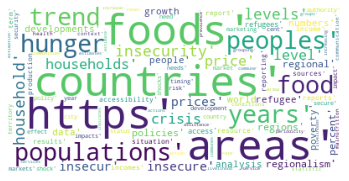

In [48]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(my_list))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [49]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(my_list)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

ability  absence  acceptance  access  accessibility  account  \
0          0        0           0       0              0        0   
1          0        0           0       0              0        0   
2          0        0           0       0              0        0   
3          0        0           0       0              0        0   
4          0        0           0       0              0        0   
..       ...      ...         ...     ...            ...      ...   
869        0        0           0       0              0        0   
870        0        0           0       0              0        0   
871        0        0           0       0              0        0   
872        0        0           0       0              0        0   
873        0        0           0       0              0        0   

     accountability  achievement  action  actions  ...  years  yemen  yield  \
0                 0            0       0        0  ...      0      0      0   
1                 0            0       0        0  ...      0      0      0   
2                 0            0       0        0  ...      0      0      0   
3                 0            0       0        0  ...      0      0      0   
4                 0            0       0        0  ...      0      0      0   
..              ...          ...     ...      ...  ...    ...    ...    ...   
869               0            0       0        0  ...      0      0      0   
870               0            0       0        0  ...      0      0      0   
871               0            0       0        0  ...      0      0      0   
872               0            0       0        0  ...      0      0      0   
873               0            0       0        0  ...      0      0      0   

     zone  zoning  ˆelds  ˆgure  ˆgures  ˇooding  ˇoods  
0       0       0      0      0       0        0      0  
1       0       0      0      0       0        0      0  
2       0       0      0      0       0        0      0  
3       0       0      0      0       0        0      0  
4       0       0      0      0       0        0      0  
..    ...     ...    ...    ...     ...      ...    ...  
869     0       0      0      0       0        0      0  
870     0       0      0      0       0        0      0  
871     0       0      0      0       0        0      0  
872     0       0      0      0       0        0      0  
873     0       0      0      0       0        0      0  

[874 rows x 1000 columns]

In [50]:
lda_model_kw = LatentDirichletAllocation(n_components=4, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model_kw, tf_feature_names, no_top_words)

Topic 0:
population opportunity diversity dimension time strategy availability coefficient regression review
Topic 1:
change definition methodology methodologies point child wasting stunting anaemia vulnerability
Topic 2:
authority territory development area status city country food trend hunger
Topic 3:
obesity age group overweight variability climate productivity extreme face ability


In [51]:
import pyLDAvis.sklearn


In [52]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model_kw, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2       47.172672 -362.084503       1        1  25.856722
1      276.189331 -292.695801       2        1  25.311925
3      -22.217518 -133.068283       3        1  24.733360
0      206.799118  -63.679634       4        1  24.097994, topic_info=    Category      Freq         Term     Total  loglift  logprob
672  Default  0.000000   population  0.000000  30.0000  30.0000
614  Default  0.000000  opportunity  0.000000  29.0000  29.0000
275  Default  0.000000    diversity  0.000000  28.0000  28.0000
255  Default  0.000000    dimension  0.000000  27.0000  27.0000
921  Default  0.000000         time  0.000000  26.0000  26.0000
..       ...       ...          ...       ...      ...      ...
43    Topic4  0.619549   assessment  0.995782   0.9485  -5.9635
605   Topic4  0.619549    objective  0.995782   0.9485  -5.9635
513   Topic4  0.619549         link  0.995782   0.9485  -5.9635
345   Topic4  0.619549      factors  0.995782   0.9485  -5.9635
359   Topic4  0.619549       figure  0.995782   0.9485  -5.9635

[150 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         3  1.002390        ability
17        3  1.002391            age
19        1  0.999861         agency
30        2  0.993847        anaemia
38        1  0.999861           area
...     ...       ...            ...
959       2  0.993847      variation
966       1  0.999861         vision
968       2  0.993847  vulnerability
973       2  0.993847        wasting
981       4  1.004236          woman

[120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

## Convert bigrams_trigram to string 

In [53]:
bitri_str = ''.join(bigrams_trigrams)

### find keywords from bigram and trigram combine

In [54]:
bitri_str_k_words = keywords(listToStr)

In [55]:
print(bitri_str_k_words)

foods
countries
areas
https
populations
years
peoples
trend hunger food insecurity
levels
household
households
crisis level
price
prices
insecure
insecur
regionalism
regions
regional
percent
policies
developments
growth poverty
world people
analysis data
numbers
refugee
refugees
access
accessibility
http term
results
sources
situation
income
incomes
report
reporting
reports
production resource
development status country territory city area authority
market
marketing
markets
security
secure
timing
impact
impacts
effect policy
need
needs
shock
shocks
cent
risk
year statistic
health
malnutrition context
conditions
communication
communities
commune
communes
grouping
groups
assistance
rate
rates
periodicity
livelihood
livelihoods
service
services
estimate
estimates
estimation
prevalence
action
actions
increase
increasing
indicates
indication
indicators
activities
inequalities
inequity
crop
cropping
crops
capacities
changes
conˇicts
conˇict
disease activity
emerge
emergency
emerges
emergenci

In [56]:
bitri_str_input=k_words.replace('\n',',')
print(bitri_str_input)

foods,countries,areas,https,populations,years,peoples,trend hunger food insecurity,levels,household,households,crisis level,price,prices,insecure,insecur,regionalism,regions,regional,percent,policies,developments,growth poverty,world people,analysis data,numbers,refugee,refugees,access,accessibility,http term,results,sources,situation,income,incomes,report,reporting,reports,production resource,development status country territory city area authority,market,marketing,markets,security,secure,timing,impact,impacts,effect policy,need,needs,shock,shocks,cent,risk,year statistic,health,malnutrition context,conditions,communication,communities,commune,communes,grouping,groups,assistance,rate,rates,periodicity,livelihood,livelihoods,service,services,estimate,estimates,estimation,prevalence,action,actions,increase,increasing,indicates,indication,indicators,activities,inequalities,inequity,crop,cropping,crops,capacities,changes,conˇicts,conˇict,disease activity,emerge,emergency,emerges,emergenci

In [57]:
bitri_str_list = input.split(",")

In [58]:
bitri_str_list

['foods',
 'countries',
 'areas',
 'https',
 'populations',
 'years',
 'peoples',
 'trend hunger food insecurity',
 'levels',
 'household',
 'households',
 'crisis level',
 'price',
 'prices',
 'insecure',
 'insecur',
 'regionalism',
 'regions',
 'regional',
 'percent',
 'policies',
 'developments',
 'growth poverty',
 'world people',
 'analysis data',
 'numbers',
 'refugee',
 'refugees',
 'access',
 'accessibility',
 'http term',
 'results',
 'sources',
 'situation',
 'income',
 'incomes',
 'report',
 'reporting',
 'reports',
 'production resource',
 'development status country territory city area authority',
 'market',
 'marketing',
 'markets',
 'security',
 'secure',
 'timing',
 'impact',
 'impacts',
 'effect policy',
 'need',
 'needs',
 'shock',
 'shocks',
 'cent',
 'risk',
 'year statistic',
 'health',
 'malnutrition context',
 'conditions',
 'communication',
 'communities',
 'commune',
 'communes',
 'grouping',
 'groups',
 'assistance',
 'rate',
 'rates',
 'periodicity',
 'liveli

### final bigram, trigram and keywords combined


In [59]:
## final bigram, trigram and keywords combined
final_bigrams_trigrams = bigrams_trigrams + bitri_str_list
print(final_bigrams_trigrams)

['woman fruit', 'fruit street', 'street market', 'market flagship', 'flagship publication', 'publication part', 'part series', 'series citation', 'citation slowdown', 'slowdown downturn', 'downturn Licence', 'Licence designation', 'designation presentation', 'presentation material', 'material information', 'information product', 'product expression', 'expression opinion', 'opinion whatsoever', 'whatsoever part', 'part development', 'development status', 'status country', 'country territory', 'territory city', 'city area', 'area authority', 'authority delimitation', 'delimitation frontier', 'frontier boundary', 'boundary mention', 'mention company', 'company product', 'product manufacturer', 'manufacturer preference', 'preference others', 'others nature', 'nature designation', 'designation presentation', 'presentation material', 'material map', 'map expression', 'expression opinion', 'opinion whatsoever', 'whatsoever part', 'part status', 'status country', 'country territory', 'territor

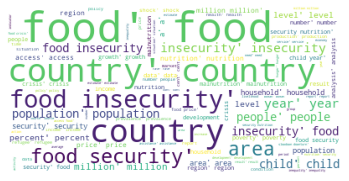

In [60]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(final_bigrams_trigrams))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [61]:
type(final_bigrams_trigrams)

list

In [62]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(final_bigrams_trigrams)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

MemoryError: 

MemoryError: 

In [63]:
lda_model_bt = LatentDirichletAllocation(n_components=3, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model_bt, tf_feature_names, no_top_words)

Topic 0:
country year percent child shock prevalence commodity level rate growth
Topic 1:
nutrition data production http development cent service policy area situation
Topic 2:
food insecurity population people household malnutrition price number million analysis


In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model_bt, tf, tf_vectorizer, mds='tsne')
panel